In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Average productivity of a hectare (I assume that we have 10ha available)

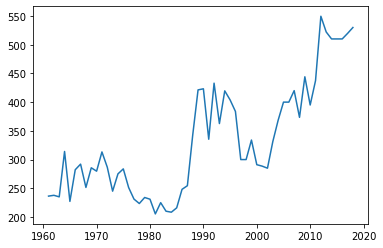

Average production of a hectare =  333.2689655172413 kg


In [2]:
cocoa = pd.read_csv('ghana_cocoa_beans_yield.csv', sep = ';')
plt.plot(cocoa['Year'],cocoa['Yield'])
plt.show()
srednia_produkcja = cocoa['Yield'].mean()
print("Average production of a hectare = ",srednia_produkcja, "kg")

Average USD/PLN

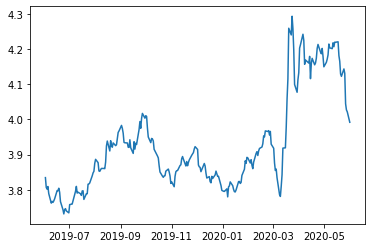

In [3]:
usd = pd.read_csv('usdpln.csv',sep = ";")
usd['Data'] = pd.to_datetime(usd['Data'])
plt.plot(usd['Data'],usd['Kurs'])
plt.show()

Rainfall

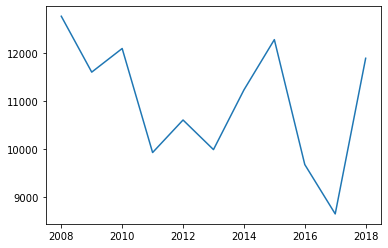

Average rainfall =  10972.0 mm


In [4]:
rain = pd.read_csv('ghana_rainfall.csv',sep=";")
plt.plot(rain['Year'],rain['Rainfall'])
plt.show()
srednia_opad = rain['Rainfall'].mean()
print("Average rainfall = ",srednia_opad, "mm")

Temperature

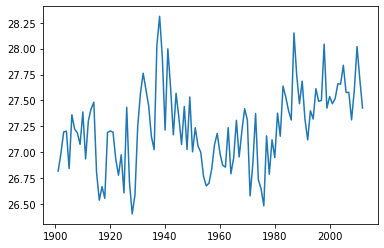

Average temperature =  27.238846240327387 °C


In [5]:
temp = pd.read_csv('ghana_temp.csv',sep=";")
plt.plot(temp['Year'],temp['Temperature'])
plt.show()
srednia_temp = temp['Temperature'].mean()
print("Average temperature = ",srednia_temp, "°C")

In [6]:
def kurs_usd_pln():
    sredni_usd = usd['Kurs'].mean()
    odchylenie_usd = usd['Kurs'].std()
    
    wylosowany_usd = np.random.normal(sredni_usd, odchylenie_usd)
    return wylosowany_usd
def opady():
    sredni_rain = rain['Rainfall'].mean()
    odchylenie_rain = rain['Rainfall'].std()
    
    wylosowany_rain = np.random.normal(sredni_rain, odchylenie_rain)
    return wylosowany_rain
def temperatura():
    sredni_temp = temp['Temperature'].mean()
    odchylenie_temp = temp['Temperature'].std()
    
    wylosowany_temp = np.random.normal(sredni_temp, odchylenie_temp)
    return wylosowany_temp
def produkcja(opady, temp):
    produkcja = 10*srednia_produkcja*(opady/srednia_opad)*(temp/srednia_temp) #mamy 10 hektarów
    return produkcja
def dochod(produkcja,cena,koszty_stale_usd,kurs_usd,koszty_zmienne = 0.3):
    wynik = produkcja*cena*(1-koszty_zmienne) - koszty_stale_usd*kurs_usd
    return wynik

# Simulation

Forecasted financial result is 78277.90840010926 PLN


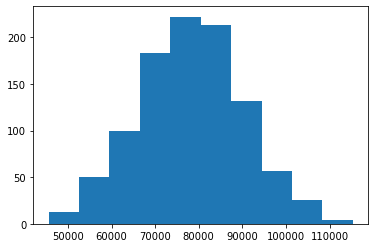

In [7]:
from statistics import mean

cena = 42 #PLN
koszty_stale = 5000 #USD
koszty_zmienne = 0.3
roczny_wynik_finansowy=[]

np.random.seed(102667)
for x in range(1000):
    o = opady()
    t = temperatura()
    kurs = kurs_usd_pln()
    prod = produkcja(o,t)
    roczny_wynik_finansowy.append(dochod(prod,cena,koszty_stale,kurs,koszty_zmienne))
plt.hist(roczny_wynik_finansowy)
plt.show
wynik = mean(roczny_wynik_finansowy)
print("Forecasted financial result is",format(wynik),"PLN")

Zysk od ceny, koszty stałe 5000 USD

[3679.0480681868253, 6010.262453559401, 8341.476838931978, 10672.691224304554, 13003.90560967713, 15335.119995049705, 17666.334380422282, 19997.548765794858, 22328.763151167434, 24659.97753654001, 26991.191921912585, 29322.40630728516, 31653.620692657736, 33984.835078030315, 36316.04946340289, 38647.26384877547, 40978.47823414804, 43309.69261952062, 45640.90700489319, 47972.12139026577, 50303.33577563834, 52634.55016101092, 54965.76454638349, 57296.97893175607, 59628.193317128644, 61959.40770250122, 64290.6220878738, 66621.83647324638, 68953.05085861895, 71284.26524399153, 73615.4796293641]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


<function matplotlib.pyplot.show(close=None, block=None)>

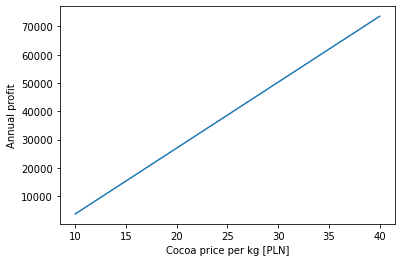

In [8]:
koszty_stale = 5000 #USD
koszty_zmienne = 0.3
roczny_wynik_finansowy=[]
cena = [] #PLN

for c in range(10,41):
    cena.append(c)
    wynik=[]
    np.random.seed(102667)
    for x in range(1000):
        o = opady()
        t = temperatura()
        kurs = kurs_usd_pln()
        prod = produkcja(o,t)
        wynik.append(dochod(prod,c,koszty_stale,kurs,koszty_zmienne))
    roczny_wynik_finansowy.append(mean(wynik))
print(roczny_wynik_finansowy)
print(cena)
plt.plot(cena,roczny_wynik_finansowy)
plt.ylabel("Annual profit")
plt.xlabel("Cocoa price per kg [PLN]")
plt.show

Profit on fixed costs, price 30 PLN/kg

[66009.8124040695, 64046.5028255156, 62083.1932469617, 60119.88366840781, 58156.574089853915, 56193.264511300025, 54229.95493274613, 52266.64535419224, 50303.33577563834, 48340.02619708445, 46376.716618530554, 44413.407039976664, 42450.09746142277, 40486.78788286888, 38523.47830431498, 36560.16872576109, 34596.85914720719, 32633.549568653303, 30670.23999009941]
[1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]


<function matplotlib.pyplot.show(close=None, block=None)>

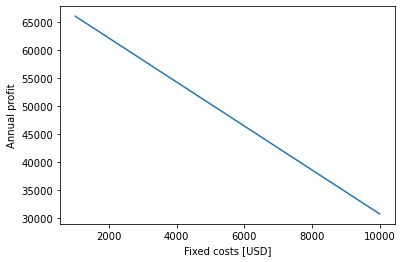

In [9]:
koszty_stale = [] #USD
koszty_zmienne = 0.3
roczny_wynik_finansowy=[]
cena = 30 #PLN

for c in range(1000,10001,500):
    koszty_stale.append(c)
    wynik=[]
    np.random.seed(102667)
    for x in range(1000):
        o = opady()
        t = temperatura()
        kurs = kurs_usd_pln()
        prod = produkcja(o,t)
        wynik.append(dochod(prod,cena,c,kurs,koszty_zmienne))
    roczny_wynik_finansowy.append(mean(wynik))
print(roczny_wynik_finansowy)
print(koszty_stale)
plt.plot(koszty_stale,roczny_wynik_finansowy)
plt.ylabel("Annual profit")
plt.xlabel("Fixed costs [USD]")
plt.show

Profit on price and fixed costs

In [10]:
koszty_stale = [] #USD
koszty_zmienne = 0.3
roczny_wynik_finansowy={}
cena = [] #PLN

for k in range(1000,10001,500):
    for c in range(10,41,1):
        wynik=[]
        np.random.seed(102667)
        for x in range(1000):
            o = opady()
            t = temperatura()
            kurs = kurs_usd_pln()
            prod = produkcja(o,t)
            wynik.append(dochod(prod,c,k,kurs,koszty_zmienne))
    
        roczny_wynik_finansowy[(c,k)]=mean(wynik)
print(roczny_wynik_finansowy)

{(10, 1000): 19385.524696617973, (11, 1000): 21716.73908199055, (12, 1000): 24047.953467363124, (13, 1000): 26379.1678527357, (14, 1000): 28710.382238108275, (15, 1000): 31041.59662348085, (16, 1000): 33372.81100885343, (17, 1000): 35704.025394226, (18, 1000): 38035.23977959858, (19, 1000): 40366.454164971154, (20, 1000): 42697.66855034373, (21, 1000): 45028.882935716305, (22, 1000): 47360.097321088884, (23, 1000): 49691.311706461456, (24, 1000): 52022.526091834035, (25, 1000): 54353.74047720661, (26, 1000): 56684.95486257919, (27, 1000): 59016.16924795176, (28, 1000): 61347.38363332434, (29, 1000): 63678.59801869692, (30, 1000): 66009.8124040695, (31, 1000): 68341.02678944207, (32, 1000): 70672.24117481464, (33, 1000): 73003.45556018721, (34, 1000): 75334.6699455598, (35, 1000): 77665.88433093237, (36, 1000): 79997.09871630494, (37, 1000): 82328.31310167752, (38, 1000): 84659.5274870501, (39, 1000): 86990.74187242267, (40, 1000): 89321.95625779525, (10, 1500): 17422.21511806408, (11, 

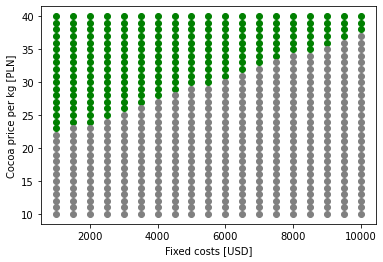

In [11]:
#Annual profit for renting a container is 48000 PLN

ok = [r for r in roczny_wynik_finansowy.keys() if roczny_wynik_finansowy[r]>48000]
not_ok = [r for r in roczny_wynik_finansowy.keys() if roczny_wynik_finansowy[r]<48000]

plt.scatter([v[1] for v in ok],
            [v[0] for v in ok],
            c="green")
plt.scatter([v[1] for v in not_ok],
            [v[0] for v in not_ok], 
            c="gray" )
plt.ylabel("Cocoa price per kg [PLN]")
plt.xlabel("Fixed costs [USD]")
plt.show()